<a href="https://colab.research.google.com/github/vanshjain271/Insta_Audience_Analyzer/blob/main/ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy joblib imbalanced-learn
# optional (raw signal helpers / deep learning)
!pip install wfdb biosppy neurokit2 tensorflow
# optional for xgboost
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.0/158.0 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 68.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 

In [ ]:
from google.colab import files

# Upload the downloaded zip file
uploaded = files.upload()   # browse and upload your kaggle zip file here


Saving archive.zip to archive.zip


In [ ]:
import zipfile
import os

# Replace with your actual file name
zip_file = 'archive.zip'

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('ecg_dataset')

# Check the extracted files
os.listdir('ecg_dataset')


['ECGCvdata.csv']

In [ ]:
import pandas as pd

df = pd.read_csv('ecg_dataset/ECGCvdata.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 56 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RECORD      1200 non-null   int64  
 1   hbpermin    1200 non-null   float64
 2   Pseg        1200 non-null   float64
 3   PQseg       1200 non-null   float64
 4   QRSseg      1200 non-null   float64
 5   QRseg       1200 non-null   float64
 6   QTseg       1200 non-null   float64
 7   RSseg       1200 non-null   float64
 8   STseg       1200 non-null   float64
 9   Tseg        1200 non-null   float64
 10  PTseg       1200 non-null   float64
 11  ECGseg      1200 non-null   float64
 12  QRtoQSdur   431 non-null    float64
 13  RStoQSdur   431 non-null    float64
 14  RRmean      1200 non-null   float64
 15  PPmean      1200 non-null   float64
 16  PQdis       1200 non-null   float64
 17  PonQdis     1200 non-null   float64
 18  PRdis       1200 non-null   float64
 19  PonRdis     1200 non-null  

In [ ]:
df['ECG_signal'].head()


,ECG_signal
0,ARR
1,ARR
2,ARR
3,ARR
4,ARR


In [ ]:
import pandas as pd

df = pd.read_csv('ecg_dataset/ECGCvdata.csv')
df.head()


,RECORD,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,1,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,2,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,3,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,4,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,5,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,...,263.225676,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [ ]:
X = df.drop(['RECORD','ECG_signal'], axis=1)
y = df['ECG_signal']



In [ ]:
X = X.fillna(X.mean())


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Classes:", le.classes_)


Classes: ['AFF' 'ARR' 'CHF' 'NSR']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.9708333333333333
              precision    recall  f1-score   support

         AFF       0.95      0.95      0.95        60
         ARR       0.98      1.00      0.99        60
         CHF       0.95      0.93      0.94        60
         NSR       1.00      1.00      1.00        60

    accuracy                           0.97       240
   macro avg       0.97      0.97      0.97       240
weighted avg       0.97      0.97      0.97       240



In [ ]:
import joblib
joblib.dump((rf, scaler, le), 'ecg_model.pkl')


['ecg_model.pkl']

In [ ]:
from google.colab import files
files.download('ecg_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

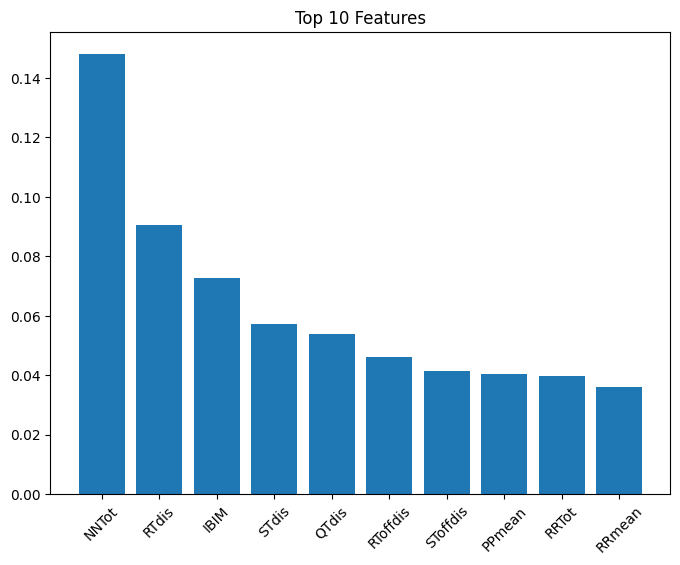

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]
plt.figure(figsize=(8,6))
plt.title("Top 10 Features")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), X.columns[indices], rotation=45)
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report

num_features = X_train.shape[1]
num_classes = len(le.classes_)

model = models.Sequential([
    layers.Input(shape=(num_features,)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    verbose=1)


Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4753 - loss: 1.1617 - val_accuracy: 0.7708 - val_loss: 0.5982
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7543 - loss: 0.6267 - val_accuracy: 0.8854 - val_loss: 0.4143
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8833 - loss: 0.3899 - val_accuracy: 0.9271 - val_loss: 0.2979
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9127 - loss: 0.2985 - val_accuracy: 0.9271 - val_loss: 0.2498
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9271 - loss: 0.2514 - val_accuracy: 0.9323 - val_loss: 0.1973
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9193 - loss: 0.2270 - val_accuracy: 0.9375 - val_loss: 0.1781
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.1893 - val_accuracy: 0.9375 - val_loss: 0.1571
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9426 - loss: 0.1796 - val_accuracy: 0.9531 - val_loss

In [ ]:
y_pred_nn = model.predict(X_test)
y_pred_nn_classes = y_pred_nn.argmax(axis=1)

print("Neural Net Accuracy:", accuracy_score(y_test, y_pred_nn_classes))
print(classification_report(y_test, y_pred_nn_classes, target_names=le.classes_))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Neural Net Accuracy: 0.9791666666666666
              precision    recall  f1-score   support

         AFF       0.97      0.95      0.96        60
         ARR       1.00      1.00      1.00        60
         CHF       0.95      0.97      0.96        60
         NSR       1.00      1.00      1.00        60

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



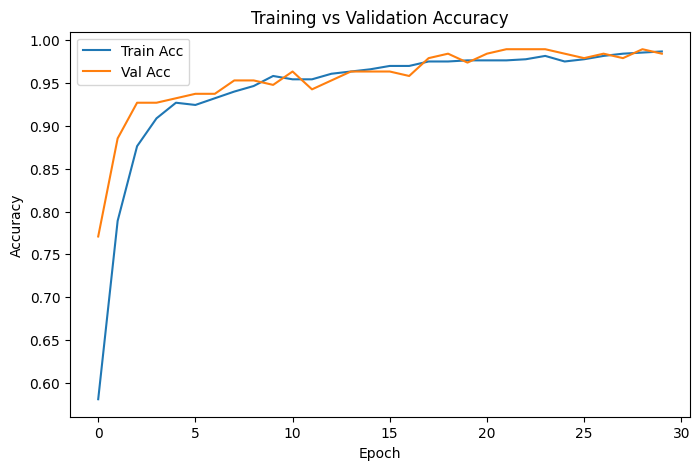

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()
